In [1]:
from scipy.stats import ttest_ind, norm, f, ranksums, pearsonr
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
import numpy as np
import pandas as pd

In [3]:
def formatnum(x, pos):
    if x == 0:
        return 0
    return '$%.1f$x$10^{5}$' % (x/1e5)

def ftest(s1, s2):
    '''F检验样本总体方差是否相等'''
    F = np.var(s1) / np.var(s2)
    v1 = len(s1) - 1
    v2 = len(s2) - 1
    p_val = 1 - 2 * abs(0.5 - f.cdf(F, v1, v2))
    print(p_val)
    if p_val < 0.05:
        print('Reject the Null Hypothesis.')
        equal_var = False
    else:
        print('Accept the Null Hypothesis.')
        equal_var = True
    return equal_var

def ttest_ind_func(s1, s2):
    '''t检验独立样本所需的两个总体均值是否存在差异'''
    equal_var = ftest(s1, s2)
    print('Null Hypothesis: mean(s1) = mean(s2), α=0.5')
    ttest, pval = ttest_ind(s1, s2, equal_var=equal_var)
    if pval < 0.05:
        print("Reject the Null Hypothesis.")
    else:
        print("Accept the Null Hypothesis.")
    return ttest, pval

In [4]:
raw_data = pd.read_csv('info.csv')

In [5]:
raw_data

,filename,lung,left lung,right lung,covid,covid in left lung,covid in right lung,cnt,age,gender
0,coronacases_org_001.nii.gz,3323006.484,1.517082e+06,1.805925e+06,2.969244e+05,1.988468e+05,9.807756e+04,22,61.0,F
1,coronacases_org_002.nii.gz,4636537.428,2.157007e+06,2.479531e+06,1.506329e+05,1.008191e+05,4.981376e+04,21,47.0,M
2,coronacases_org_003.nii.gz,3334059.939,1.456132e+06,1.877928e+06,6.832010e+05,3.516297e+05,3.315713e+05,16,50.0,M
3,coronacases_org_004.nii.gz,4555471.928,2.144352e+06,2.411120e+06,2.605202e+04,0.000000e+00,2.605202e+04,2,41.0,M
4,coronacases_org_005.nii.gz,4732901.346,2.124887e+06,2.608015e+06,6.183277e+04,6.183277e+04,0.000000e+00,3,46.0,M
5,coronacases_org_006.nii.gz,4401430.906,2.144877e+06,2.256554e+06,1.130474e+05,1.130474e+05,0.000000e+00,2,32.0,M
6,coronacases_org_007.nii.gz,2910198.137,1.371063e+06,1.539135e+06,6.583646e+04,4.798852e+04,1.784793e+04,7,41.0,F
7,coronacases_org_008.nii.gz,3821448.342,1.719577e+06,2.101871e+06,2.531573e+05,1.519482e+05,1.012092e+05,23,34.0,M
8,coronacases_org_009.nii.gz,2624395.542,1.234245e+06,1.390151e+06,7.493354e+04,7.493354e+04,0.000000e+00,7,64.0,M
9,coronacases_org_010.nii.gz,2283141.699,9.758338e+05,1.307308e+06,3.618146e+05,1.934887e+05,1.683259e+05,8,55.0,F


In [6]:
per_data = pd.concat([raw_data['covid']/raw_data['lung'], raw_data['covid in left lung']/raw_data['left lung'], raw_data['covid in right lung']/raw_data['right lung']], axis=1)
per_data.columns=['percent', 'percent left', 'percent right']

In [7]:
raw_data = pd.concat([raw_data, per_data], axis=1)

In [8]:
raw_data

,filename,lung,left lung,right lung,covid,covid in left lung,covid in right lung,cnt,age,gender,percent,percent left,percent right
0,coronacases_org_001.nii.gz,3323006.484,1.517082e+06,1.805925e+06,2.969244e+05,1.988468e+05,9.807756e+04,22,61.0,F,0.089354,0.131072,0.054309
1,coronacases_org_002.nii.gz,4636537.428,2.157007e+06,2.479531e+06,1.506329e+05,1.008191e+05,4.981376e+04,21,47.0,M,0.032488,0.046740,0.020090
2,coronacases_org_003.nii.gz,3334059.939,1.456132e+06,1.877928e+06,6.832010e+05,3.516297e+05,3.315713e+05,16,50.0,M,0.204916,0.241482,0.176562
3,coronacases_org_004.nii.gz,4555471.928,2.144352e+06,2.411120e+06,2.605202e+04,0.000000e+00,2.605202e+04,2,41.0,M,0.005719,0.000000,0.010805
4,coronacases_org_005.nii.gz,4732901.346,2.124887e+06,2.608015e+06,6.183277e+04,6.183277e+04,0.000000e+00,3,46.0,M,0.013064,0.029099,0.000000
5,coronacases_org_006.nii.gz,4401430.906,2.144877e+06,2.256554e+06,1.130474e+05,1.130474e+05,0.000000e+00,2,32.0,M,0.025684,0.052706,0.000000
6,coronacases_org_007.nii.gz,2910198.137,1.371063e+06,1.539135e+06,6.583646e+04,4.798852e+04,1.784793e+04,7,41.0,F,0.022623,0.035001,0.011596
7,coronacases_org_008.nii.gz,3821448.342,1.719577e+06,2.101871e+06,2.531573e+05,1.519482e+05,1.012092e+05,23,34.0,M,0.066246,0.088364,0.048152
8,coronacases_org_009.nii.gz,2624395.542,1.234245e+06,1.390151e+06,7.493354e+04,7.493354e+04,0.000000e+00,7,64.0,M,0.028553,0.060712,0.000000
9,coronacases_org_010.nii.gz,2283141.699,9.758338e+05,1.307308e+06,3.618146e+05,1.934887e+05,1.683259e+05,8,55.0,F,0.158472,0.198280,0.128758


In [9]:
clean_data = raw_data[(raw_data['covid'] < 1e6) & (raw_data['covid'] > 1e2)]

In [10]:
clean_data

,filename,lung,left lung,right lung,covid,covid in left lung,covid in right lung,cnt,age,gender,percent,percent left,percent right
0,coronacases_org_001.nii.gz,3323006.484,1.517082e+06,1805924.955,296924.36000,198846.79780,98077.562190,22,61.0,F,0.089354,0.131072,0.054309
1,coronacases_org_002.nii.gz,4636537.428,2.157007e+06,2479530.816,150632.88690,100819.12990,49813.756940,21,47.0,M,0.032488,0.046740,0.020090
2,coronacases_org_003.nii.gz,3334059.939,1.456132e+06,1877927.612,683200.97790,351629.71810,331571.259800,16,50.0,M,0.204916,0.241482,0.176562
3,coronacases_org_004.nii.gz,4555471.928,2.144352e+06,2411119.951,26052.01631,0.00000,26052.016310,2,41.0,M,0.005719,0.000000,0.010805
4,coronacases_org_005.nii.gz,4732901.346,2.124887e+06,2608014.782,61832.76675,61832.76675,0.000000,3,46.0,M,0.013064,0.029099,0.000000
5,coronacases_org_006.nii.gz,4401430.906,2.144877e+06,2256554.267,113047.42680,113047.42680,0.000000,2,32.0,M,0.025684,0.052706,0.000000
6,coronacases_org_007.nii.gz,2910198.137,1.371063e+06,1539135.398,65836.45868,47988.52482,17847.933860,7,41.0,F,0.022623,0.035001,0.011596
7,coronacases_org_008.nii.gz,3821448.342,1.719577e+06,2101871.094,253157.34970,151948.17580,101209.173900,23,34.0,M,0.066246,0.088364,0.048152
8,coronacases_org_009.nii.gz,2624395.542,1.234245e+06,1390151.011,74933.54302,74933.54302,0.000000,7,64.0,M,0.028553,0.060712,0.000000
9,coronacases_org_010.nii.gz,2283141.699,9.758338e+05,1307307.936,361814.60820,193488.67560,168325.932600,8,55.0,F,0.158472,0.198280,0.128758


In [11]:
male_data = clean_data[(clean_data['gender'] == 'M')]

In [12]:
female_data = clean_data[(clean_data['gender'] == 'F')]

In [13]:
d1 = male_data['lung']
d2 = female_data['lung']
_d = pd.concat([d1, d2], axis=1)
_d.columns = ['male', 'female']

In [14]:
ttest_ind_func(d1, d2)

0.10463307558040058
Accept the Null Hypothesis.
Null Hypothesis: mean(s1) = mean(s2), α=0.5
Reject the Null Hypothesis.


(2.203569797900631, 0.04359746786643697)

In [15]:
ranksums(d1, d2)

RanksumsResult(statistic=2.49100947511811, pvalue=0.012738072274857496)

In [16]:
d1.describe()

count    1.300000e+01
mean     4.474527e+06
std      1.312372e+06
min      2.624396e+06
25%      3.821448e+06
50%      4.401431e+06
75%      4.732901e+06
max      7.829892e+06
Name: lung, dtype: float64

In [17]:
d2.describe()

count    4.000000e+00
mean     2.968933e+06
std      5.005262e+05
min      2.283142e+06
25%      2.753434e+06
50%      3.116602e+06
75%      3.332101e+06
max      3.359384e+06
Name: lung, dtype: float64

In [18]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

In [19]:
title_font = {'family': 'Times New Roman', 'size': 24}
label_font = {'family': 'Times New Roman', 'size': 20}
tick_font = {'family': 'Times New Roman', 'size': 14}

Text(1.75, 0.2, '$p=0.73410$')

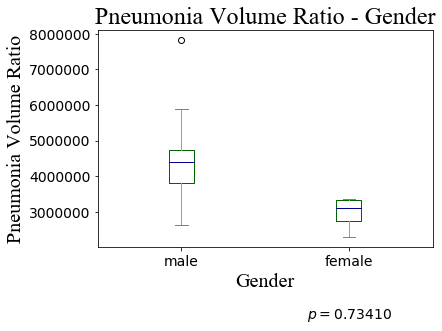

In [20]:
_d.plot.box(grid=True, color=color)
ax=plt.gca()
ax.set_ylabel('Pneumonia Volume Ratio', label_font)
ax.set_xlabel('Gender', label_font)
plt.title('Pneumonia Volume Ratio - Gender', title_font)
plt.grid(False)
plt.tick_params(labelsize=14)
plt.text(1.75, .200, '$p=0.73410$', tick_font)

In [21]:
d1 = male_data['covid']
d2 = female_data['covid']
_d = pd.concat([d1, d2], axis=1)
_d.columns = ['male', 'female']

In [22]:
ranksums(d1, d2)

RanksumsResult(statistic=-0.3396831102433787, pvalue=0.7340951823194757)

Text(1.75, 800000.0, '$p=0.73410$')

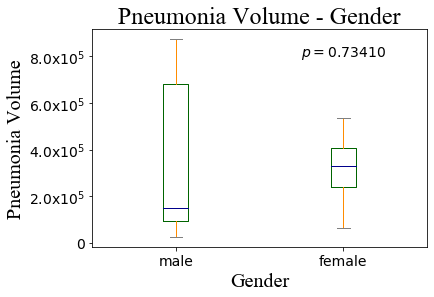

In [23]:
formatter = FuncFormatter(formatnum)
_d.plot.box(grid=True, color=color)
ax=plt.gca()
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Pneumonia Volume', label_font)
ax.set_xlabel('Gender', label_font)
plt.grid(False)
plt.tick_params(labelsize=14)
plt.title('Pneumonia Volume - Gender', title_font)
plt.text(1.75, 8e5, '$p=0.73410$', tick_font)

In [24]:
young_data = clean_data[(clean_data['age'] < 50.0)]
old_data = clean_data[(clean_data['age'] >= 50.0)]

In [25]:
young = young_data['covid']
old = old_data['covid']
_a = pd.concat([young, old], axis=1)
_a.columns = ['< 50 yr', '>= 50 yr']

In [26]:
ttest_ind_func(young, old)

0.0006828471871941355
Reject the Null Hypothesis.
Null Hypothesis: mean(s1) = mean(s2), α=0.5
Reject the Null Hypothesis.


(-4.126677050657813, 0.003567231676779107)

In [27]:
ranksums(young, old)

RanksumsResult(statistic=-2.8867513459481287, pvalue=0.003892417122778628)

Text(0.75, 800000.0, '$p=0.00389^{*}$')

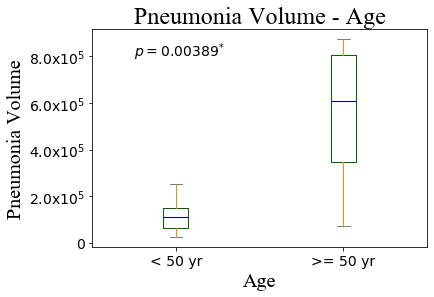

In [28]:
formatter = FuncFormatter(formatnum)
_a.plot.box(grid=True, color=color)
ax=plt.gca()
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Pneumonia Volume', label_font)
ax.set_xlabel('Age', label_font)
plt.grid(False)
plt.tick_params(labelsize=14)
plt.title('Pneumonia Volume - Age', title_font)
plt.text(.75, 8e5, '$p=0.00389^{*}$', tick_font)

In [29]:
young = young_data['percent']
old = old_data['percent']
_a = pd.concat([young, old], axis=1)
_a.columns = ['< 50 yr', '>= 50 yr']

In [30]:
ttest_ind_func(young, old)

0.0012163816516390646
Reject the Null Hypothesis.
Null Hypothesis: mean(s1) = mean(s2), α=0.5
Reject the Null Hypothesis.


(-5.438576374394988, 0.0006555994610454133)

In [31]:
ranksums(young, old)

RanksumsResult(statistic=-3.2716515254078793, pvalue=0.001069212754919368)

Text(0.75, 0.2, '$p=0.00107^{*}$')

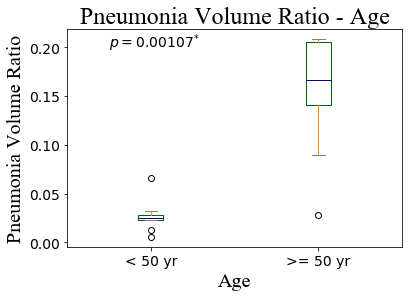

In [32]:
_a.plot.box(grid=True, color=color)
ax=plt.gca()
ax.set_ylabel('Pneumonia Volume Ratio', label_font)
ax.set_xlabel('Age', label_font)
plt.title('Pneumonia Volume Ratio - Age', title_font)
plt.grid(False)
plt.tick_params(labelsize=14)
plt.text(0.75, .200, '$p=0.00107^{*}$', tick_font)

In [33]:
age_data = raw_data[(~np.isnan(raw_data['age'])) & (raw_data['covid'] < 1e6) & (raw_data['covid'] > 1e2)].iloc[:, list(range(1, 9))]

In [34]:
age_data

,lung,left lung,right lung,covid,covid in left lung,covid in right lung,cnt,age
0,3323006.484,1.517082e+06,1805924.955,296924.36000,198846.79780,98077.56219,22,61.0
1,4636537.428,2.157007e+06,2479530.816,150632.88690,100819.12990,49813.75694,21,47.0
2,3334059.939,1.456132e+06,1877927.612,683200.97790,351629.71810,331571.25980,16,50.0
3,4555471.928,2.144352e+06,2411119.951,26052.01631,0.00000,26052.01631,2,41.0
4,4732901.346,2.124887e+06,2608014.782,61832.76675,61832.76675,0.00000,3,46.0
5,4401430.906,2.144877e+06,2256554.267,113047.42680,113047.42680,0.00000,2,32.0
6,2910198.137,1.371063e+06,1539135.398,65836.45868,47988.52482,17847.93386,7,41.0
7,3821448.342,1.719577e+06,2101871.094,253157.34970,151948.17580,101209.17390,23,34.0
8,2624395.542,1.234245e+06,1390151.011,74933.54302,74933.54302,0.00000,7,64.0
9,2283141.699,9.758338e+05,1307307.936,361814.60820,193488.67560,168325.93260,8,55.0


In [35]:
per_data = pd.concat([age_data['covid']/age_data['lung'], age_data['covid in left lung']/age_data['left lung'], age_data['covid in right lung']/age_data['right lung']], axis=1)
per_data.columns=['percent', 'percent left', 'percent right']

In [36]:
age_data = pd.concat([age_data, per_data], axis=1)

In [37]:
age_data

,lung,left lung,right lung,covid,covid in left lung,covid in right lung,cnt,age,percent,percent left,percent right
0,3323006.484,1.517082e+06,1805924.955,296924.36000,198846.79780,98077.56219,22,61.0,0.089354,0.131072,0.054309
1,4636537.428,2.157007e+06,2479530.816,150632.88690,100819.12990,49813.75694,21,47.0,0.032488,0.046740,0.020090
2,3334059.939,1.456132e+06,1877927.612,683200.97790,351629.71810,331571.25980,16,50.0,0.204916,0.241482,0.176562
3,4555471.928,2.144352e+06,2411119.951,26052.01631,0.00000,26052.01631,2,41.0,0.005719,0.000000,0.010805
4,4732901.346,2.124887e+06,2608014.782,61832.76675,61832.76675,0.00000,3,46.0,0.013064,0.029099,0.000000
5,4401430.906,2.144877e+06,2256554.267,113047.42680,113047.42680,0.00000,2,32.0,0.025684,0.052706,0.000000
6,2910198.137,1.371063e+06,1539135.398,65836.45868,47988.52482,17847.93386,7,41.0,0.022623,0.035001,0.011596
7,3821448.342,1.719577e+06,2101871.094,253157.34970,151948.17580,101209.17390,23,34.0,0.066246,0.088364,0.048152
8,2624395.542,1.234245e+06,1390151.011,74933.54302,74933.54302,0.00000,7,64.0,0.028553,0.060712,0.000000
9,2283141.699,9.758338e+05,1307307.936,361814.60820,193488.67560,168325.93260,8,55.0,0.158472,0.198280,0.128758


In [38]:
age_data.corr()

,lung,left lung,right lung,covid,covid in left lung,covid in right lung,cnt,age,percent,percent left,percent right
lung,1.000000,0.927167,0.895610,-0.081377,-0.036584,-0.110715,-0.092666,-0.339182,-0.296509,-0.388807,-0.310433
left lung,0.927167,1.000000,0.911735,0.114295,0.190196,0.016518,-0.179148,-0.228517,-0.127644,-0.253661,-0.225070
right lung,0.895610,0.911735,1.000000,0.160878,0.079297,0.211898,-0.072317,-0.112083,-0.092901,-0.289979,-0.095518
covid,-0.081377,0.114295,0.160878,1.000000,0.904886,0.904641,0.239269,0.649959,0.951509,0.825068,0.854074
covid in left lung,-0.036584,0.190196,0.079297,0.904886,1.000000,0.637193,0.090570,0.569483,0.859753,0.847102,0.639882
covid in right lung,-0.110715,0.016518,0.211898,0.904641,0.637193,1.000000,0.342547,0.606658,0.862029,0.645757,0.905750
cnt,-0.092666,-0.179148,-0.072317,0.239269,0.090570,0.342547,1.000000,0.268087,0.292487,0.252407,0.439205
age,-0.339182,-0.228517,-0.112083,0.649959,0.569483,0.606658,0.268087,1.000000,0.637975,0.579783,0.542429
percent,-0.296509,-0.127644,-0.092901,0.951509,0.859753,0.862029,0.292487,0.637975,1.000000,0.933471,0.934735
percent left,-0.388807,-0.253661,-0.289979,0.825068,0.847102,0.645757,0.252407,0.579783,0.933471,1.000000,0.822346


In [39]:
age_data.corr('kendall')

,lung,left lung,right lung,covid,covid in left lung,covid in right lung,cnt,age,percent,percent left,percent right
lung,1.000000,0.720588,0.867647,0.014706,-0.029412,-0.061113,-0.059708,-0.208979,-0.191176,-0.294118,-0.168061
left lung,0.720588,1.000000,0.735294,0.117647,0.073529,0.000000,-0.089562,-0.194051,-0.058824,-0.191176,-0.106948
right lung,0.867647,0.735294,1.000000,0.029412,-0.014706,0.000000,-0.074635,-0.194051,-0.147059,-0.279412,-0.106948
covid,0.014706,0.117647,0.029412,1.000000,0.867647,0.702802,0.298541,0.417957,0.794118,0.691176,0.656967
covid in left lung,-0.029412,0.073529,-0.014706,0.867647,1.000000,0.565297,0.194051,0.388103,0.779412,0.735294,0.519462
covid in right lung,-0.061113,0.000000,0.000000,0.702802,0.565297,1.000000,0.418718,0.488504,0.641689,0.443071,0.888889
cnt,-0.059708,-0.089562,-0.074635,0.298541,0.194051,0.418718,1.000000,0.227273,0.298541,0.238833,0.480750
age,-0.208979,-0.194051,-0.194051,0.417957,0.388103,0.488504,0.227273,1.000000,0.432884,0.417957,0.426472
percent,-0.191176,-0.058824,-0.147059,0.794118,0.779412,0.641689,0.298541,0.432884,1.000000,0.779412,0.656967
percent left,-0.294118,-0.191176,-0.279412,0.691176,0.735294,0.443071,0.238833,0.417957,0.779412,1.000000,0.519462


In [40]:
age_data.corr('spearman')

,lung,left lung,right lung,covid,covid in left lung,covid in right lung,cnt,age,percent,percent left,percent right
lung,1.000000,0.860294,0.948529,-0.039216,-0.078431,-0.114153,-0.130222,-0.313269,-0.291667,-0.446078,-0.265529
left lung,0.860294,1.000000,0.882353,0.178922,0.144608,-0.004963,-0.156020,-0.282556,-0.034314,-0.245098,-0.148895
right lung,0.948529,0.882353,1.000000,0.034314,-0.017157,-0.022334,-0.124079,-0.270271,-0.198529,-0.414216,-0.173711
covid,-0.039216,0.178922,0.034314,1.000000,0.968137,0.858627,0.471746,0.582311,0.924020,0.852941,0.821403
covid in left lung,-0.078431,0.144608,-0.017157,0.968137,1.000000,0.756882,0.324325,0.572483,0.916667,0.901961,0.724622
covid in right lung,-0.114153,-0.004963,-0.022334,0.858627,0.756882,1.000000,0.592069,0.645554,0.823885,0.689879,0.964824
cnt,-0.130222,-0.156020,-0.124079,0.471746,0.324325,0.592069,1.000000,0.343596,0.431205,0.334153,0.640579
age,-0.313269,-0.282556,-0.270271,0.582311,0.572483,0.645554,0.343596,1.000000,0.670764,0.637594,0.610727
percent,-0.291667,-0.034314,-0.198529,0.924020,0.916667,0.823885,0.431205,0.670764,1.000000,0.916667,0.818922
percent left,-0.446078,-0.245098,-0.414216,0.852941,0.901961,0.689879,0.334153,0.637594,0.916667,1.000000,0.732066


In [41]:
import seaborn as sns

In [42]:
raw_data

,filename,lung,left lung,right lung,covid,covid in left lung,covid in right lung,cnt,age,gender,percent,percent left,percent right
0,coronacases_org_001.nii.gz,3323006.484,1.517082e+06,1.805925e+06,2.969244e+05,1.988468e+05,9.807756e+04,22,61.0,F,0.089354,0.131072,0.054309
1,coronacases_org_002.nii.gz,4636537.428,2.157007e+06,2.479531e+06,1.506329e+05,1.008191e+05,4.981376e+04,21,47.0,M,0.032488,0.046740,0.020090
2,coronacases_org_003.nii.gz,3334059.939,1.456132e+06,1.877928e+06,6.832010e+05,3.516297e+05,3.315713e+05,16,50.0,M,0.204916,0.241482,0.176562
3,coronacases_org_004.nii.gz,4555471.928,2.144352e+06,2.411120e+06,2.605202e+04,0.000000e+00,2.605202e+04,2,41.0,M,0.005719,0.000000,0.010805
4,coronacases_org_005.nii.gz,4732901.346,2.124887e+06,2.608015e+06,6.183277e+04,6.183277e+04,0.000000e+00,3,46.0,M,0.013064,0.029099,0.000000
5,coronacases_org_006.nii.gz,4401430.906,2.144877e+06,2.256554e+06,1.130474e+05,1.130474e+05,0.000000e+00,2,32.0,M,0.025684,0.052706,0.000000
6,coronacases_org_007.nii.gz,2910198.137,1.371063e+06,1.539135e+06,6.583646e+04,4.798852e+04,1.784793e+04,7,41.0,F,0.022623,0.035001,0.011596
7,coronacases_org_008.nii.gz,3821448.342,1.719577e+06,2.101871e+06,2.531573e+05,1.519482e+05,1.012092e+05,23,34.0,M,0.066246,0.088364,0.048152
8,coronacases_org_009.nii.gz,2624395.542,1.234245e+06,1.390151e+06,7.493354e+04,7.493354e+04,0.000000e+00,7,64.0,M,0.028553,0.060712,0.000000
9,coronacases_org_010.nii.gz,2283141.699,9.758338e+05,1.307308e+06,3.618146e+05,1.934887e+05,1.683259e+05,8,55.0,F,0.158472,0.198280,0.128758


In [43]:
sns_data = raw_data.loc[:, ['lung', 'covid', 'percent', 'gender']]

In [44]:
sns_data

,lung,covid,percent,gender
0,3323006.484,2.969244e+05,0.089354,F
1,4636537.428,1.506329e+05,0.032488,M
2,3334059.939,6.832010e+05,0.204916,M
3,4555471.928,2.605202e+04,0.005719,M
4,4732901.346,6.183277e+04,0.013064,M
5,4401430.906,1.130474e+05,0.025684,M
6,2910198.137,6.583646e+04,0.022623,F
7,3821448.342,2.531573e+05,0.066246,M
8,2624395.542,7.493354e+04,0.028553,M
9,2283141.699,3.618146e+05,0.158472,F


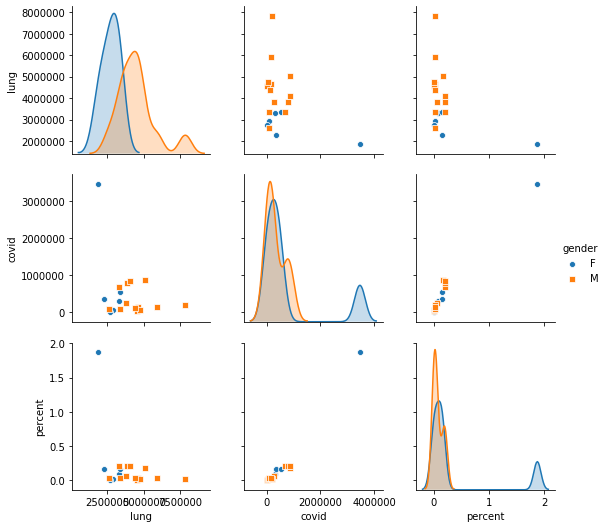

In [45]:
sns.pairplot(sns_data, hue='gender', markers=['o', 's'])

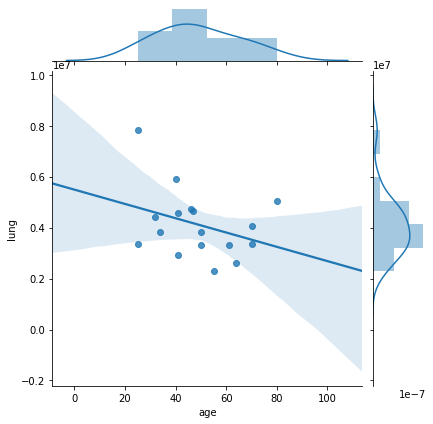

In [46]:
sns.jointplot(x='age', y='lung', data=age_data, kind='reg')

In [47]:
def sns_formatnum(x, pos):
    if x == 0:
        return 0
    return '$%.1f$x$10^{6}$' % (x/1e6)

sns_formatter = FuncFormatter(sns_formatnum)

Text(0.75, 1500000.0, 'R=0.65,P=4.7E-3')

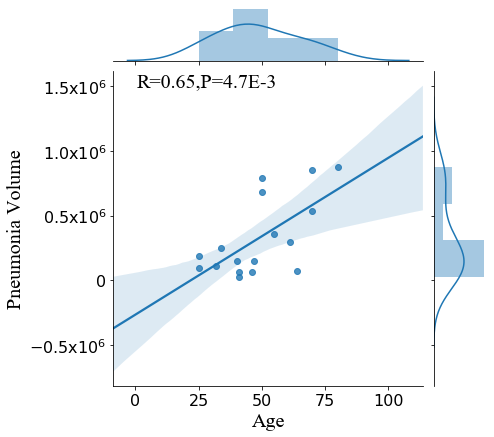

In [48]:
sns.jointplot(x='age', y='covid', data=age_data, kind='reg')
ax = plt.gca()
ax.yaxis.set_major_formatter(sns_formatter)
ax.set_ylabel('Pneumonia Volume', label_font)
ax.set_xlabel('Age', label_font)
plt.tick_params(labelsize=16)
plt.text(0.75, 15e5, 'R=0.65,P=4.7E-3', label_font)

Text(0.75, 0.4, 'R=0.64,P=5.9E-3')

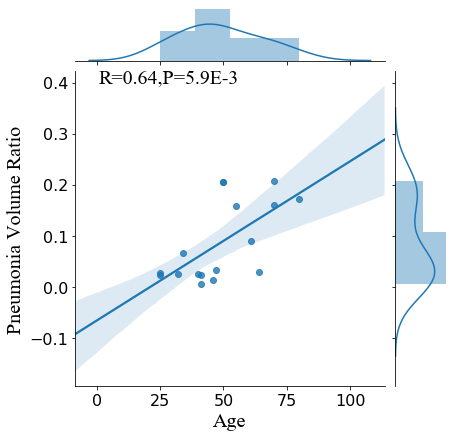

In [49]:
sns.jointplot(x='age', y='percent', data=age_data, kind='reg')
ax = plt.gca()
ax.set_ylabel('Pneumonia Volume Ratio', label_font)
ax.set_xlabel('Age', label_font)
plt.tick_params(labelsize=16)
plt.text(0.75, 0.4, 'R=0.64,P=5.9E-3', label_font)

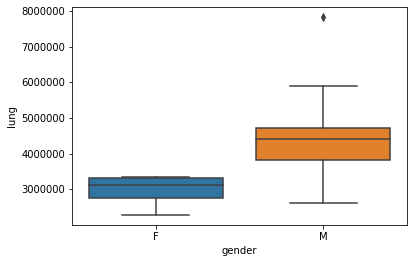

In [50]:
sns.boxplot(x='gender', y='lung', data=clean_data)

Text(-0.25, 800000.0, '$p=0.73410$')

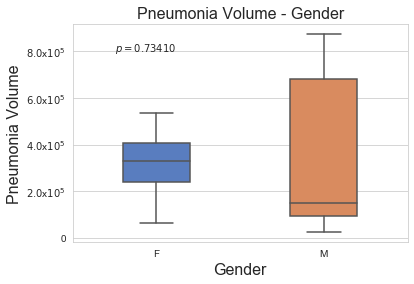

In [51]:
sns.set_style('whitegrid')
sns.set_palette('muted')
sns.boxplot(x='gender', y='covid', data=clean_data, width=0.4)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Pneumonia Volume', fontsize=16)
ax.set_xlabel('Gender', fontsize=16)
plt.title('Pneumonia Volume - Gender', fontsize=16)
plt.text(-.25, 8e5, '$p=0.73410$')

Text(-0.25, 0.2, '$p=0.73410$')

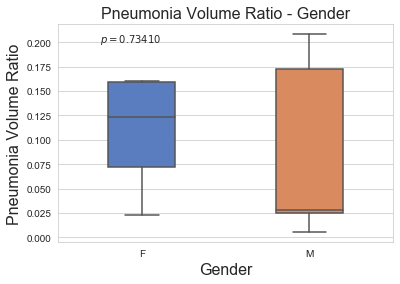

In [52]:
sns.set_style('whitegrid')
sns.set_palette('muted')
sns.boxplot(x='gender', y='percent', data=clean_data, width=0.4)
ax = plt.gca()
ax.set_ylabel('Pneumonia Volume Ratio', fontsize=16)
ax.set_xlabel('Gender', fontsize=16)
plt.title('Pneumonia Volume Ratio - Gender', fontsize=16)
plt.text(-.25, .200, '$p=0.73410$')

In [53]:
clean_data

,filename,lung,left lung,right lung,covid,covid in left lung,covid in right lung,cnt,age,gender,percent,percent left,percent right
0,coronacases_org_001.nii.gz,3323006.484,1.517082e+06,1805924.955,296924.36000,198846.79780,98077.562190,22,61.0,F,0.089354,0.131072,0.054309
1,coronacases_org_002.nii.gz,4636537.428,2.157007e+06,2479530.816,150632.88690,100819.12990,49813.756940,21,47.0,M,0.032488,0.046740,0.020090
2,coronacases_org_003.nii.gz,3334059.939,1.456132e+06,1877927.612,683200.97790,351629.71810,331571.259800,16,50.0,M,0.204916,0.241482,0.176562
3,coronacases_org_004.nii.gz,4555471.928,2.144352e+06,2411119.951,26052.01631,0.00000,26052.016310,2,41.0,M,0.005719,0.000000,0.010805
4,coronacases_org_005.nii.gz,4732901.346,2.124887e+06,2608014.782,61832.76675,61832.76675,0.000000,3,46.0,M,0.013064,0.029099,0.000000
5,coronacases_org_006.nii.gz,4401430.906,2.144877e+06,2256554.267,113047.42680,113047.42680,0.000000,2,32.0,M,0.025684,0.052706,0.000000
6,coronacases_org_007.nii.gz,2910198.137,1.371063e+06,1539135.398,65836.45868,47988.52482,17847.933860,7,41.0,F,0.022623,0.035001,0.011596
7,coronacases_org_008.nii.gz,3821448.342,1.719577e+06,2101871.094,253157.34970,151948.17580,101209.173900,23,34.0,M,0.066246,0.088364,0.048152
8,coronacases_org_009.nii.gz,2624395.542,1.234245e+06,1390151.011,74933.54302,74933.54302,0.000000,7,64.0,M,0.028553,0.060712,0.000000
9,coronacases_org_010.nii.gz,2283141.699,9.758338e+05,1307307.936,361814.60820,193488.67560,168325.932600,8,55.0,F,0.158472,0.198280,0.128758


In [54]:
clean_data.to_csv('patient_info.csv')

In [55]:
age_group = []
for a in clean_data['age']:
    if a >= 50:
        age_group.append('>= 50 yr')
    else:
        age_group.append('< 50 yr')

Text(1, 0.2, '$p=0.00107^{*}$')

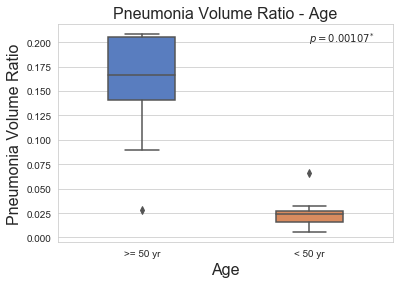

In [56]:
sns.set_style('whitegrid')
sns.set_palette('muted')
sns.boxplot(x=age_group, y=clean_data['percent'], width=0.4)
ax = plt.gca()
ax.set_ylabel('Pneumonia Volume Ratio', fontsize=16)
ax.set_xlabel('Age', fontsize=16)
plt.title('Pneumonia Volume Ratio - Age', fontsize=16)
plt.text(1, .200, '$p=0.00107^{*}$')

Text(1, 800000.0, '$p=0.00389^{*}$')

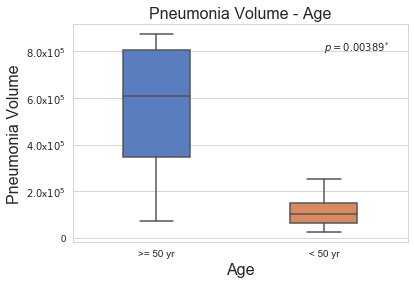

In [57]:
sns.set_style('whitegrid')
sns.set_palette('muted')
sns.boxplot(x=age_group, y=clean_data['covid'], width=0.4)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Pneumonia Volume', fontsize=16)
ax.set_xlabel('Age', fontsize=16)
plt.title('Pneumonia Volume - Age', fontsize=16)
plt.text(1, 8e5, '$p=0.00389^{*}$')